# Classification Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
filename1 = 'Gradboost'#import model approch for  joblib
filename2 = 'Adaboost'

### PreProcess


In [3]:
names=['IR', 'MR', 'FF', 'Credibility', 'Competitiveness', 'OR', 'Class']
df = pd.read_csv('../Qualitative_Bankruptcy.data.txt',names=names)

#### Clean and Engeering Data

In [4]:
for col in names:
    print(df[col].value_counts())
    print('\n****\n')

IR
N    89
A    81
P    80
Name: count, dtype: int64

****

MR
N    119
A     69
P     62
Name: count, dtype: int64

****

FF
N    119
A     74
P     57
Name: count, dtype: int64

****

Credibility
N    94
P    79
A    77
Name: count, dtype: int64

****

Competitiveness
N    103
P     91
A     56
Name: count, dtype: int64

****

OR
N    114
P     79
A     57
Name: count, dtype: int64

****

Class
NB    143
B     107
Name: count, dtype: int64

****



In [5]:
X = df.drop(['Class'],axis = 1)
X = pd.get_dummies(data=X, drop_first=True)
y = df['Class'].map({'NB':0,'B':1})

#### Split Data in Train/Test for X and y


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=1099, stratify=y)


### Model
#### Grad

In [7]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [8]:
grad = GradientBoostingClassifier()

In [9]:
pipe = Pipeline([('grad',grad)])

In [17]:
#hyper params Values
loss = ['log_loss', 'exponential']
learning_rate = list(np.logspace(-4,-1,5))
n_estimators = list(range(50,150,10))
criterion =['friedman_mse', 'squared_error']
max_depth = [1,3,5,7,9]
max_features = [1.0, 'sqrt', 'log2', None]

In [18]:
hyp_param ={
    'grad__loss': loss,
    'grad__learning_rate' : learning_rate,
    'grad__n_estimators' : n_estimators,
    'grad__criterion' : criterion,
    'grad__max_depth' : max_depth,
    'grad__max_features' : max_features,   
}

In [21]:
full_model_grad = GridSearchCV(estimator=pipe,param_grid=hyp_param,verbose=2)

#### Create Model(s)

In [22]:
full_model_grad.fit(X_train,y_train,)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=1.0, grad__n_estimators=50; total time=   0.1s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=1.0, grad__n_estimators=50; total time=   0.0s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=1.0, grad__n_estimators=50; total time=   0.0s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=1.0, grad__n_estimators=50; total time=   0.0s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, grad__loss=log_loss, grad__max_depth=1, grad__max_features=1.0, grad__n_estimators=50; total time=   0.0s
[CV] END grad__criterion=friedman_mse, grad__learning_rate=0.0001, gr

GridSearchCV(estimator=Pipeline(steps=[('grad', GradientBoostingClassifier())]),
             param_grid={'grad__criterion': ['friedman_mse', 'squared_error'],
                         'grad__learning_rate': [0.0001, 0.0005623413251903491,
                                                 0.0031622776601683794,
                                                 0.01778279410038923, 0.1],
                         'grad__loss': ['log_loss', 'exponential'],
                         'grad__max_depth': [1, 3, 5, 7, 9],
                         'grad__max_features': [1.0, 'sqrt', 'log2', None],
                         'grad__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                120, 130, 140]},
             verbose=2)

#### Train Model

### Evaluate model

In [23]:
y_pred_grad = full_model_grad.predict(X_test)

#### Test On data

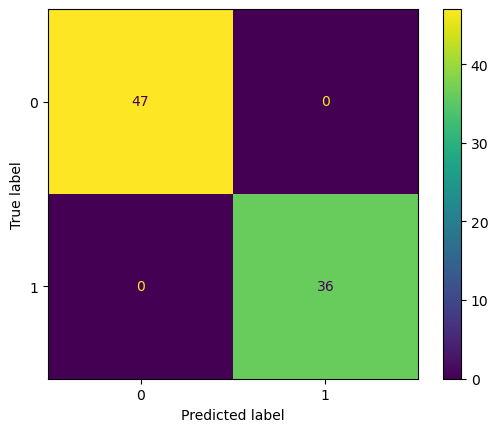

In [25]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred_grad)
                       ,display_labels=full_model_grad.classes_).plot()

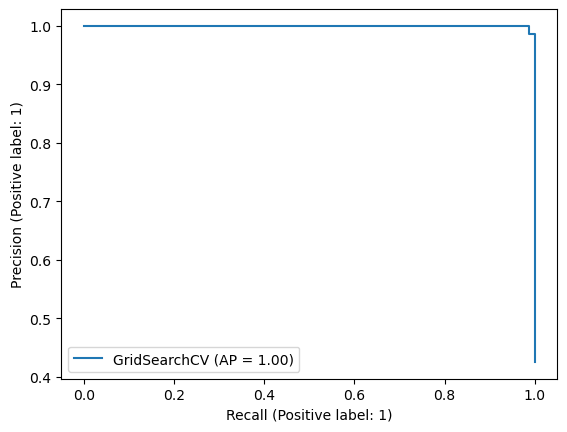

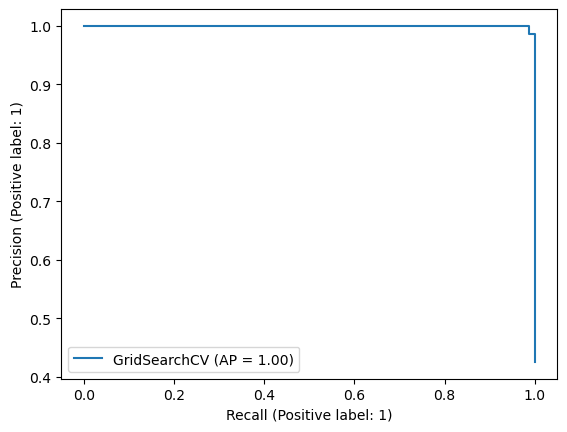

In [26]:
PrecisionRecallDisplay.from_estimator(estimator=full_model_grad,
                                     X=X_train,
                                     y=y_train).plot()

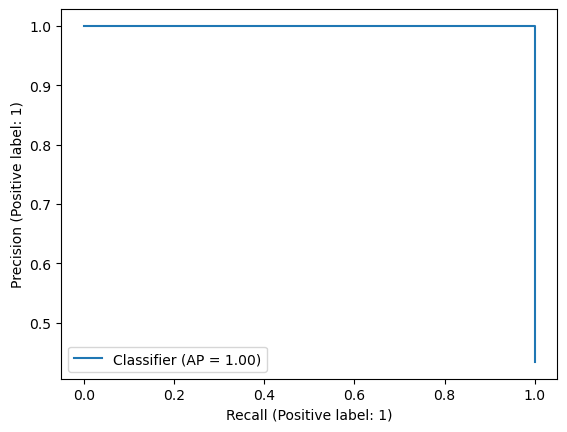

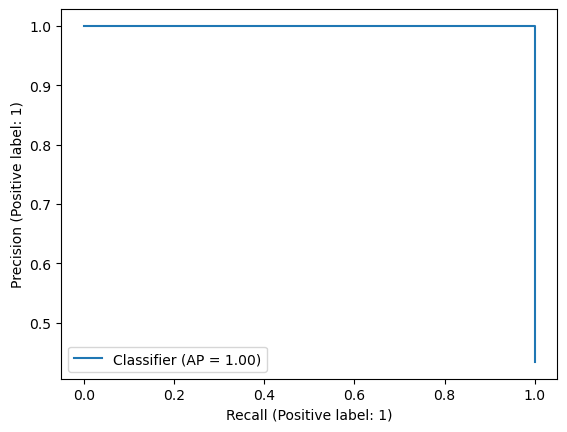

In [27]:

PrecisionRecallDisplay.from_predictions(y_pred=y_pred_grad,
                                    y_true=y_test,).plot()

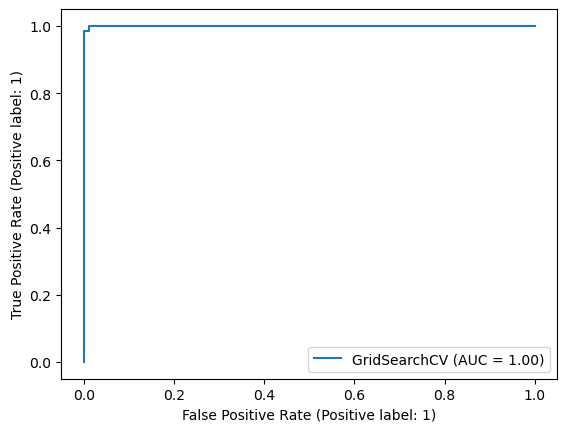

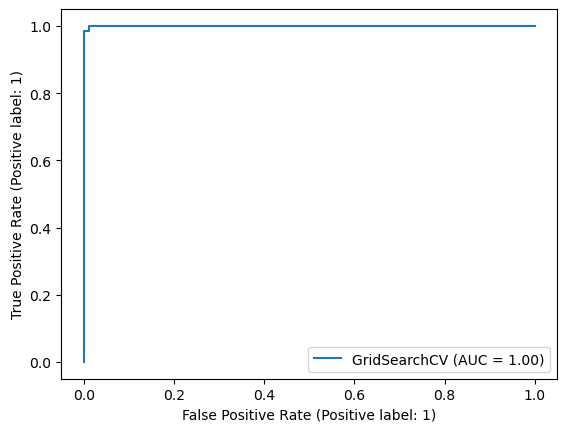

In [28]:
RocCurveDisplay.from_estimator(estimator=full_model_grad,
                                     X=X_train,
                                     y=y_train).plot()

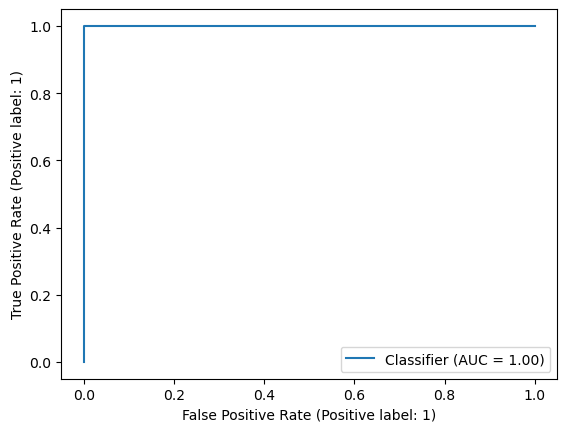

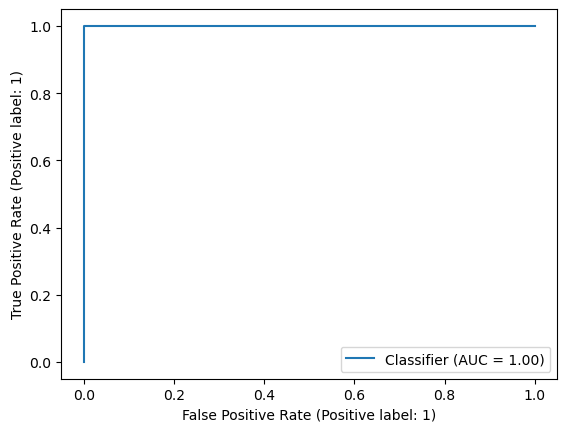

In [29]:
RocCurveDisplay.from_predictions(y_pred=y_pred_grad,
                                 y_true=y_test).plot()

In [30]:
grad = classification_report(y_pred=y_pred_grad,
                      y_true=y_test)
print(grad)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        36

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [32]:
full_model_grad.best_params_

{'grad__criterion': 'friedman_mse',
 'grad__learning_rate': 0.01778279410038923,
 'grad__loss': 'log_loss',
 'grad__max_depth': 1,
 'grad__max_features': 'sqrt',
 'grad__n_estimators': 130}

#### Train on all data

In [34]:
gradBoost_final_model = GradientBoostingClassifier(
    criterion='friedman_mse',
    learning_rate=0.01778279410038923,
    loss='log_loss',
    max_depth= 1,
    max_features='sqrt',
    n_estimators= 130
)

In [35]:
gradBoost_final_model.fit(X,y)

GradientBoostingClassifier(learning_rate=0.01778279410038923, max_depth=1,
                           max_features='sqrt', n_estimators=130)

#### Save with joblib

In [37]:
import joblib
joblib.dump(value=gradBoost_final_model,filename=filename1)

['Gradboost']

# Congratulations!!!

#### Created and trained by  Matin1099.


### Model
#### ADA

#### Create Model(s)

In [38]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample

In [39]:
ada = AdaBoostClassifier()

In [40]:
pipe = Pipeline([('ada',ada)])

In [41]:
#hyper params Values
algorithm = ['SAMME', 'SAMME.R']
learning_rate = list(np.logspace(-4,-1,5))
n_estimators = list(range(50,150,10))

In [42]:
hyp_param ={
    'ada__algorithm': algorithm,
    'ada__learning_rate' : learning_rate,
    'ada__n_estimators' : n_estimators,
}

In [43]:
full_model_ada = GridSearchCV(estimator=pipe,param_grid=hyp_param,verbose=1)

#### Train Model

In [45]:
full_model_ada.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Pipeline(steps=[('ada', AdaBoostClassifier())]),
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.0001, 0.0005623413251903491,
                                                0.0031622776601683794,
                                                0.01778279410038923, 0.1],
                         'ada__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                               120, 130, 140]},
             verbose=1)

### Evaluate model

In [46]:
y_pred_ada = full_model_ada.predict(X_test)

#### Test On data

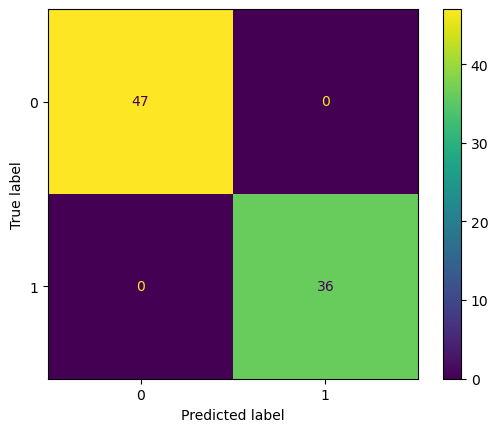

In [47]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred_ada)
                       ,display_labels=full_model_ada.classes_).plot()

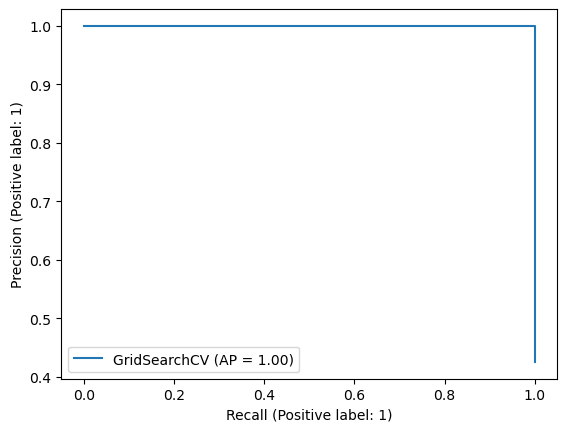

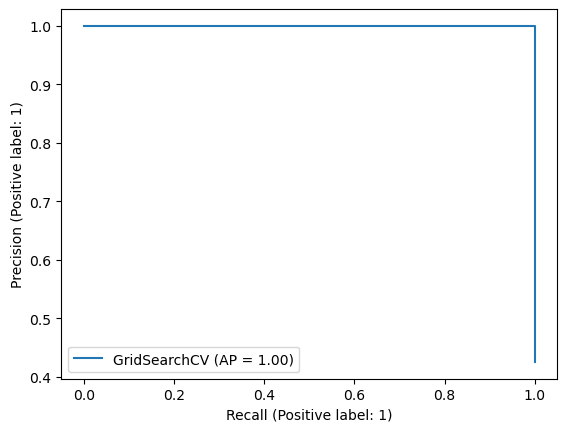

In [48]:
PrecisionRecallDisplay.from_estimator(estimator=full_model_ada,
                                     X=X_train,
                                     y=y_train).plot()

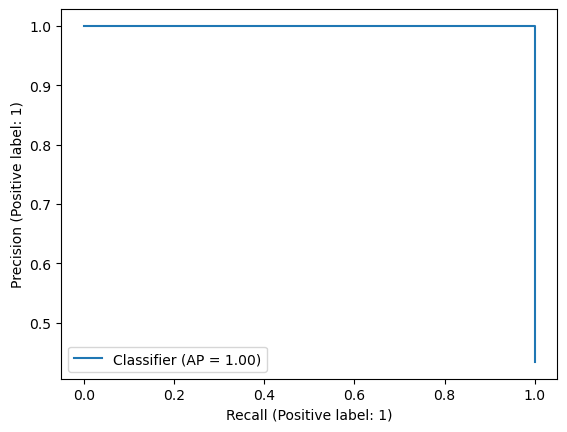

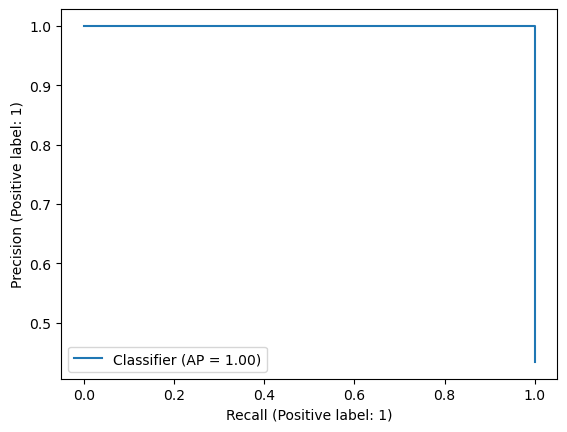

In [49]:

PrecisionRecallDisplay.from_predictions(y_pred=y_pred_ada,
                                    y_true=y_test,).plot()

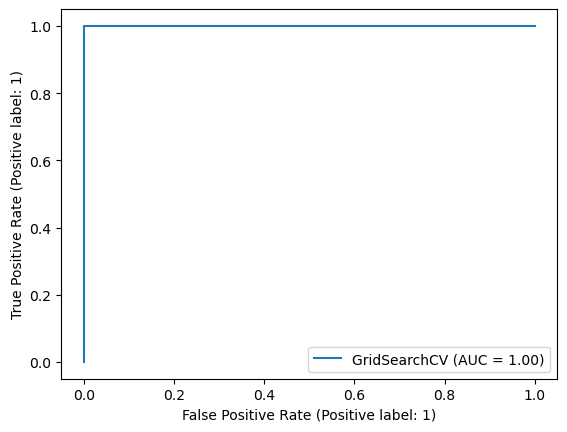

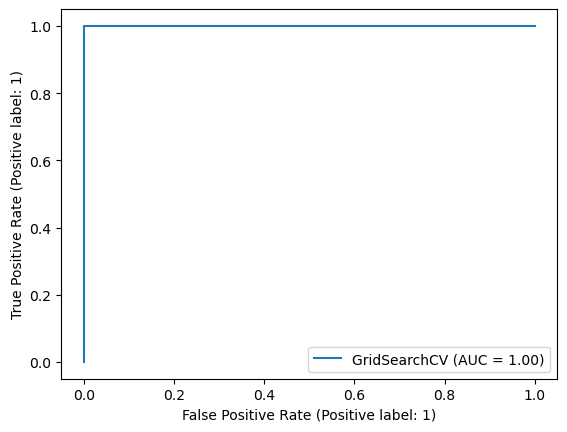

In [50]:
RocCurveDisplay.from_estimator(estimator=full_model_ada,
                                     X=X_train,
                                     y=y_train).plot()

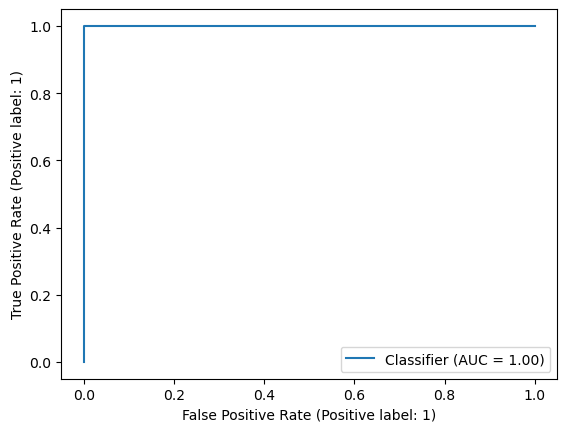

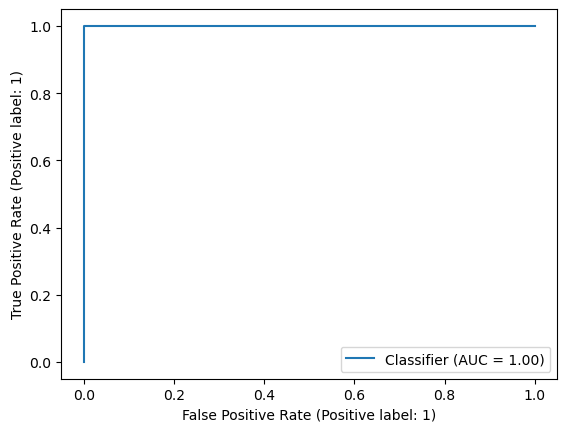

In [51]:
RocCurveDisplay.from_predictions(y_pred=y_pred_ada,
                                 y_true=y_test).plot()

In [52]:
print(classification_report(y_pred=y_pred_ada,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        36

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [53]:
full_model_ada.best_params_

{'ada__algorithm': 'SAMME', 'ada__learning_rate': 0.1, 'ada__n_estimators': 60}

### Final Model(s)


#### Train on all Data 

In [54]:
ada_final_model = AdaBoostClassifier(
    algorithm='SAMME',
    learning_rate=0.1,
    n_estimators=60)

In [55]:
ada_final_model.fit(X,y)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=60)

#### Save with joblib

In [56]:
import joblib
joblib.dump(value=ada_final_model,filename=filename2)

['Adaboost']

# Congratulations!!!

#### Created and trained by  Matin1099.
